<a href="https://colab.research.google.com/github/Bhushan271098/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Acquire and loading data**

In [83]:
# import libraries
import re
import os
import nltk
import string
import gensim
import matplotlib
import numpy as np
import pandas as pd
import tqdm as tqdm
import seaborn as sns
import tensorflow as tf
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import gensim.corpora as corpora

!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
np.random.seed(2018)
nltk.download('stopwords')

from os import path
from PIL import Image
from scipy import stats
from pprint import pprint
from sklearn import metrics
from wordcloud import WordCloud
from ctypes import DEFAULT_MODE
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from nltk.stem.snowball import SnowballStemmer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from plotly.offline import iplot,plot,init_notebook_mode
init_notebook_mode(connected= True)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score, silhouette_samples


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# File path of dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#loading the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Bhushan Patil/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **Exploratory data analysis**

In [86]:
# head of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [87]:
# shape of data
df.shape

(7787, 12)

In [88]:
# Columns present in data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [89]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [90]:
# checking null value present in data
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [91]:
# total null value
df.isnull().sum().sum()

3631

**There are total 3631 null value present in data therefore data cleaning is require.**

In [92]:
# adding text at null value
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added", "rating"], inplace=True)

In [93]:
# null value after data cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [94]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

## **Netflix Content Analysis**

In [95]:
# Extracting TV show
netflix_shows=df[df['type']=='TV Show']

In [96]:
# Extracting movie
netflix_movies=df[df['type']=='Movie']

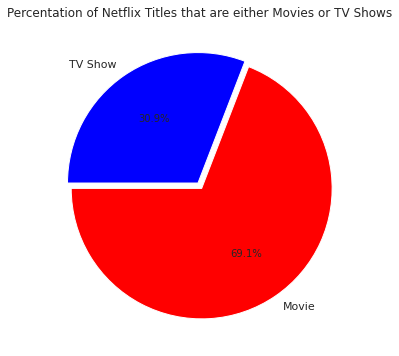

In [97]:
# pie chart of percentage of content present
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels= df.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180)
plt.show()

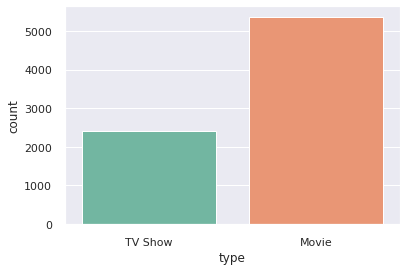

In [98]:
# countplot of content
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [99]:
# number of movie and tv show
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

**It was evident that there were more movies on Netflix than TV shows.**

## **Netflix Rating Analysis**

To make things simpler whole, 14 categories were split into three age groups: kids, Teens, Adults 

**Maturity rating**

TV-Y : Kids

TV-Y7 : Kids

TV-G : Kids

PG : Kids

TV-PG : Kids

PG-13 : Teens

TV-14 : Teens

R : Adults

TV-MA : Adults

NC-17 : Adults

NR : Adults

UR : Adults

TV-Y7-FV : Kids

G : Kids

These are maturity wise classification 

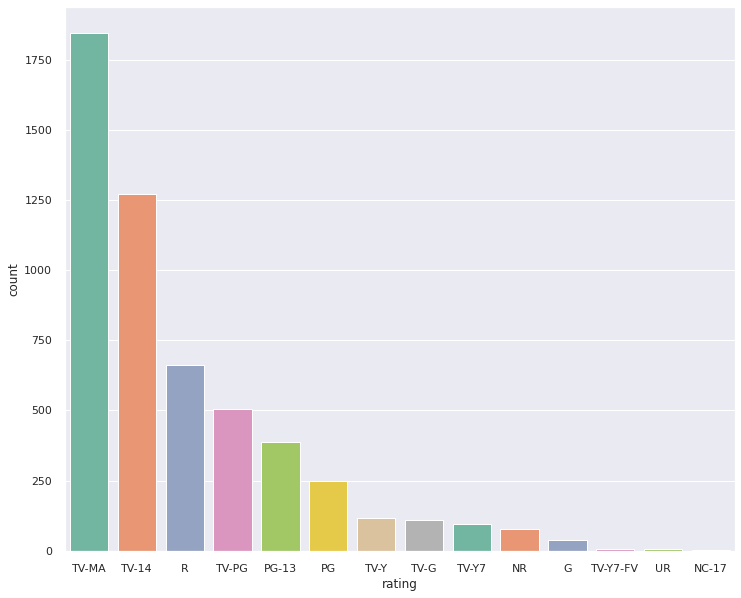

In [100]:
# countplot of netflix movie rating
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

**The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.**

**Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.**

**Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".** 

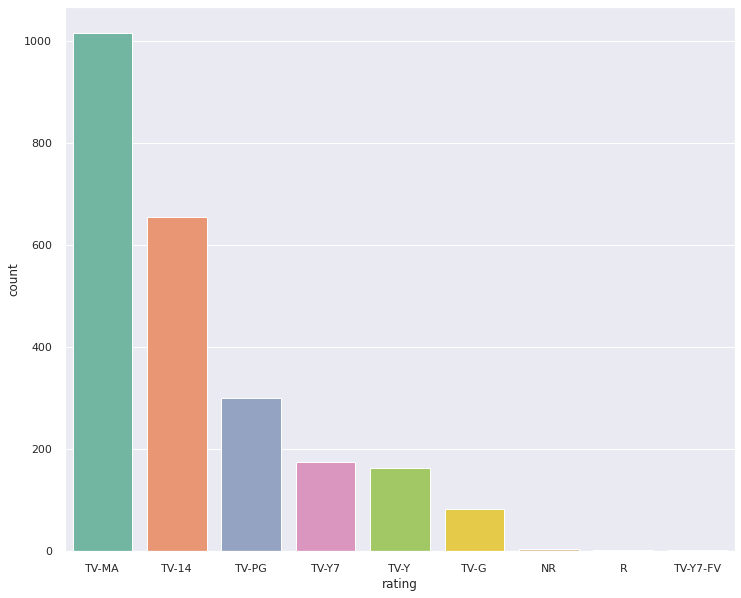

In [101]:
# countplot of TV show rating
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])

**The largest count of TV shows are made with the 'TV-MA' rating.**

**Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.**

**Third largest is the 'TV-PG' rating.**

## **Amount of Content By Rating**

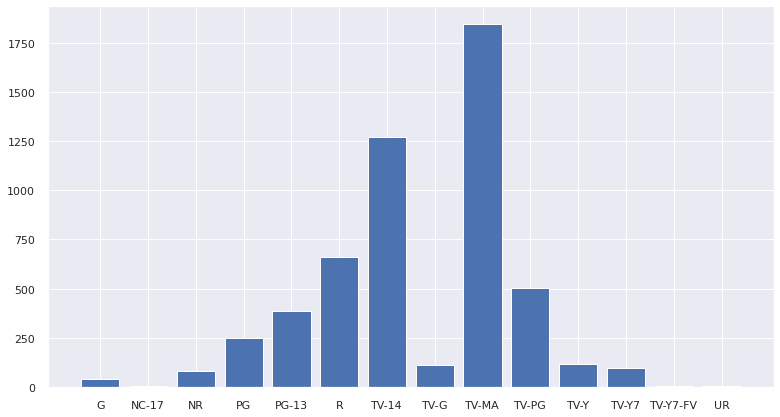

,rating,title
0,G,39
1,NC-17,3
2,NR,79
3,PG,247
4,PG-13,386
5,R,663
6,TV-14,1272
7,TV-G,111
8,TV-MA,1845
9,TV-PG,505


In [102]:
# count movie rating
order = df.rating.unique()
count_movies = netflix_movies.groupby('rating')['title'].count().reset_index()
plt.figure(figsize=(13,7))
plt.bar(count_movies.rating, count_movies.title)
plt.show()
count_movies

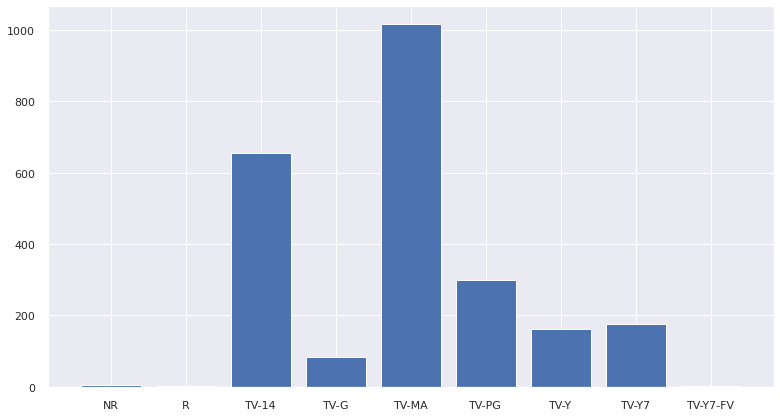

,rating,title
0,NR,4
1,R,2
2,TV-14,656
3,TV-G,83
4,TV-MA,1016
5,TV-PG,299
6,TV-Y,162
7,TV-Y7,175
8,TV-Y7-FV,1


In [103]:
# count TV show rating
count_shows = netflix_shows.groupby('rating')['title'].count().reset_index()
plt.figure(figsize=(13,7))
plt.bar(count_shows.rating, count_shows.title)
plt.show()
count_shows

## **Content growth over years**

In [104]:
# Extracting data from release year
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

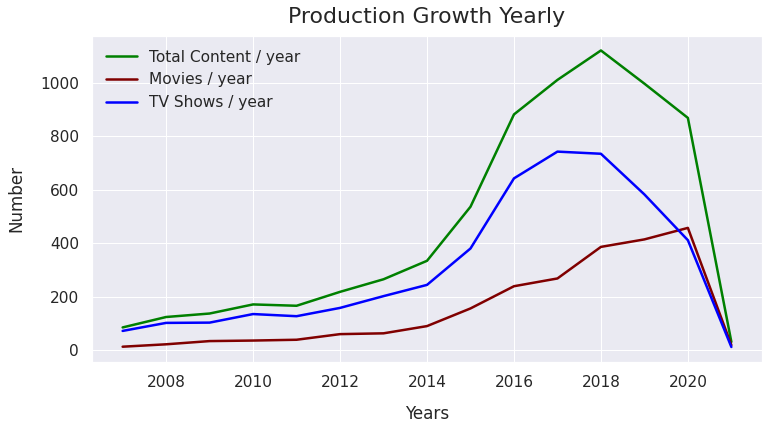

In [105]:
# plot of content
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

**Total content decreases from 2018 to 2020.**

**Movie content also decreases from 2018 to 2020.** 

**But TV show content increses from 2018 to 2020.**


## **Year wise analysis**

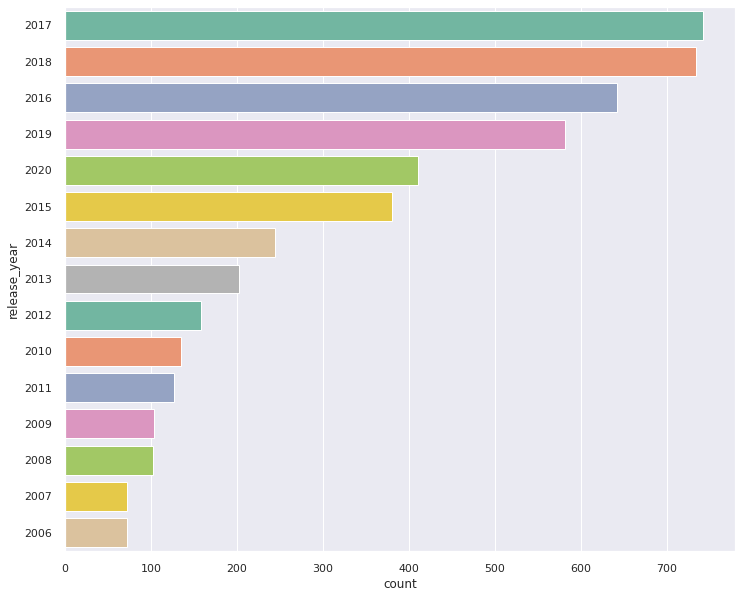

In [106]:
# countplot of release year of netflix movie
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

**So, 2017 was the year when most of the movies were released.**

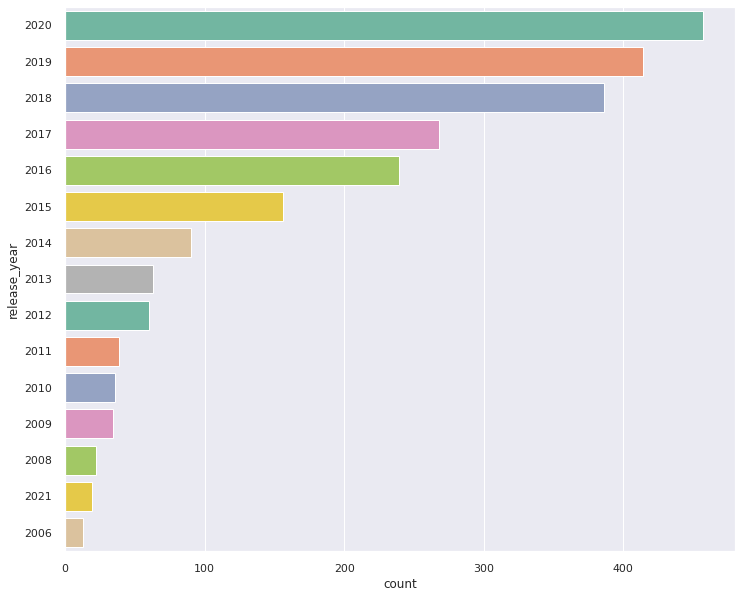

In [107]:
# countplot of release year of netflix show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="Set2", order=netflix_shows['release_year'].value_counts().index[0:15])

**So, 2020 was the year when most of the TV shows were released.**

## **Analysis of duration of movies**

In [108]:
# Extracting duration of movie
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5372, dtype: int64

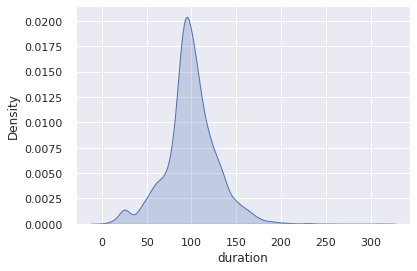

In [109]:
# plot of netflix movie duration
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

**So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.**

## **Top Genres on Netflix**

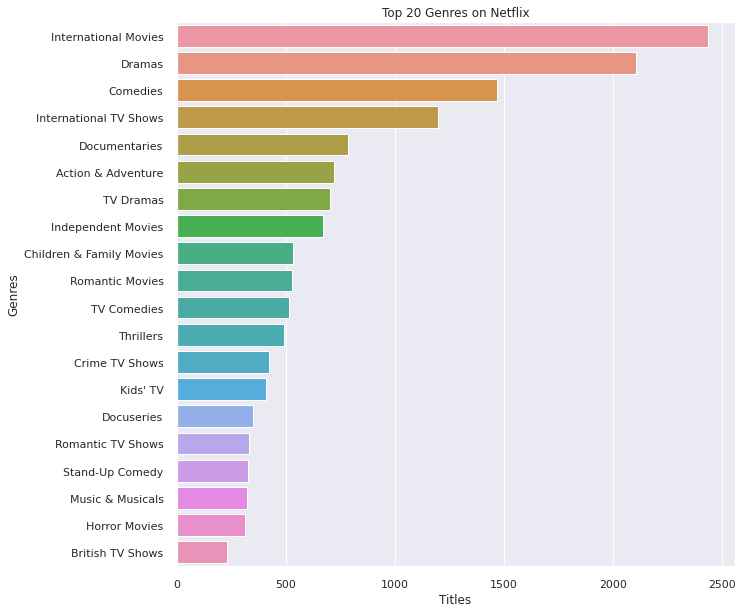

In [110]:
# Top 20 genres on Netflix
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**International Movies and Dramas were top two Genres on Netflix.**

## **Top 10 Actor Based on the Number of Titles**

In [111]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [112]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)

In [113]:
# obtain head of actor list
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


In [114]:
# Extracting top 10 actors
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

In [115]:
# print top 10 actors
top_10_actors

,Actors name,Count
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


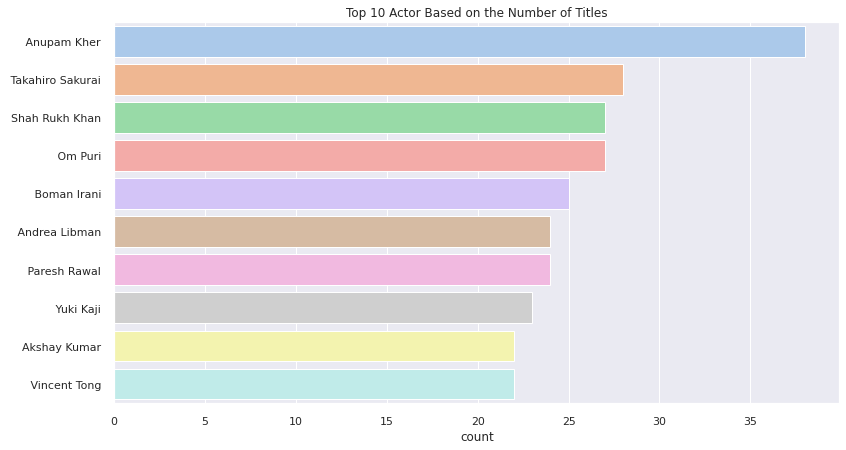

In [116]:
# count plot of top 10 actor on the number of titiles
filtered_cast = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Based on the Number of Titles')
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='pastel')
plt.show()

**Anupam kher was top actor acted in most number of titles.**

## **Top 10 Actor in Movies Based on the Number of Titles**

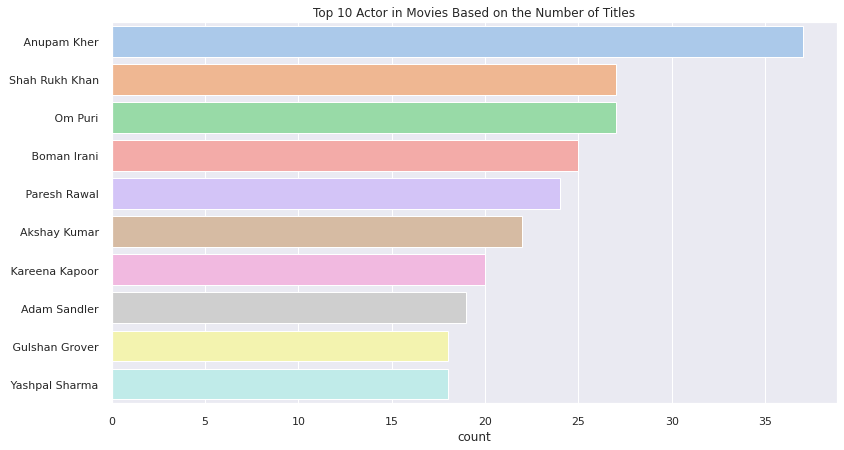

In [117]:
# top 10 actor in movie
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in Movies Based on the Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

**Anupam kher was top actor acted in most number of movies.**

## **Top 10 Actor in TV Shows Based on the Number of Titles**

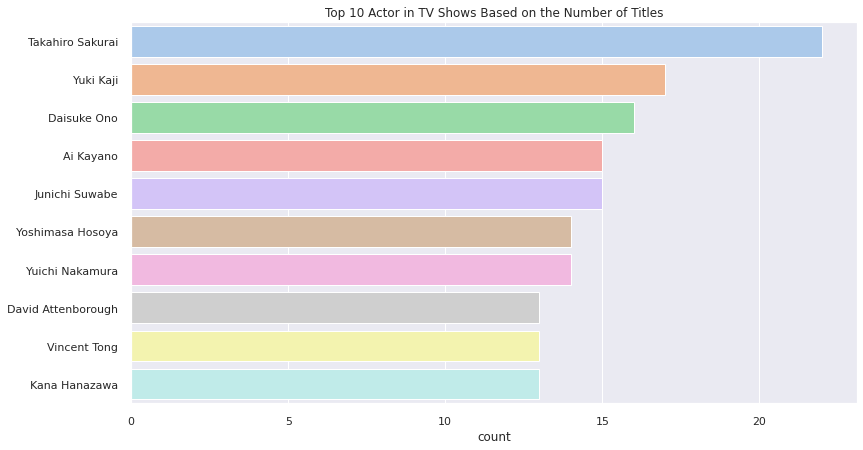

In [118]:
# top 10 actor in show
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in TV Shows Based on the Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

**Takahiro Sakurai was top actor acted in most number of TV shows.**

## **Top Directors on Netflix**

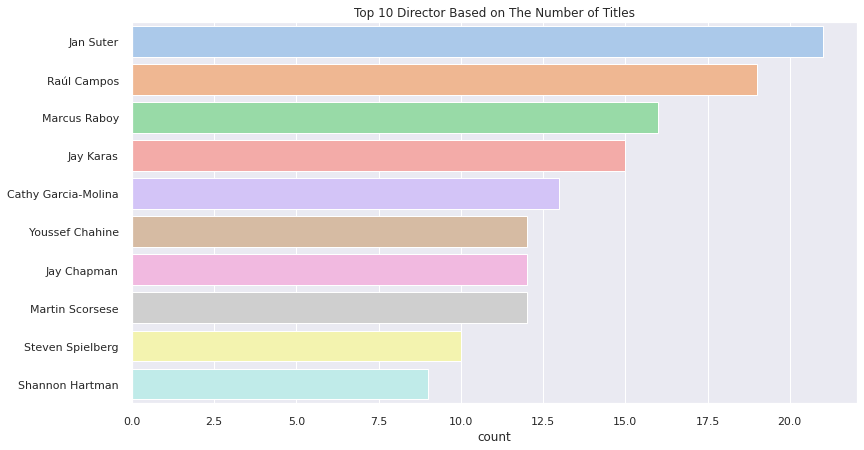

In [119]:
# Top 10 director based on number of titles
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='pastel')
plt.show()

**Jan suter and Raul Campos were top two directors on the basis of number of titles.**

## **TV shows with largest number of seasons**

In [120]:
# Extracting features
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [121]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [127]:
t=['title','no_of_seasons']
top=durations[t]
top=top.sort_values(by='no_of_seasons', ascending=False)

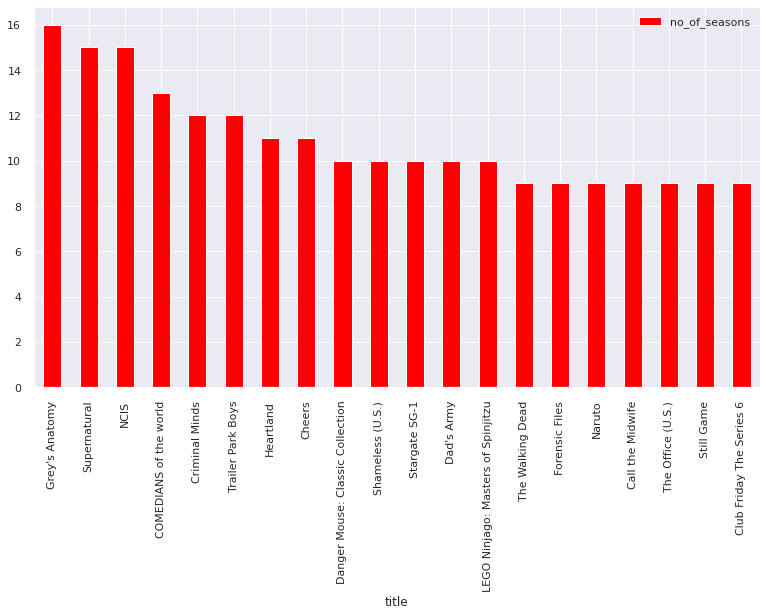

In [129]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red', figsize=(13,7))

**Grey's Anatomy had highest number of seasons 16.**

## **Release of content month-wise**

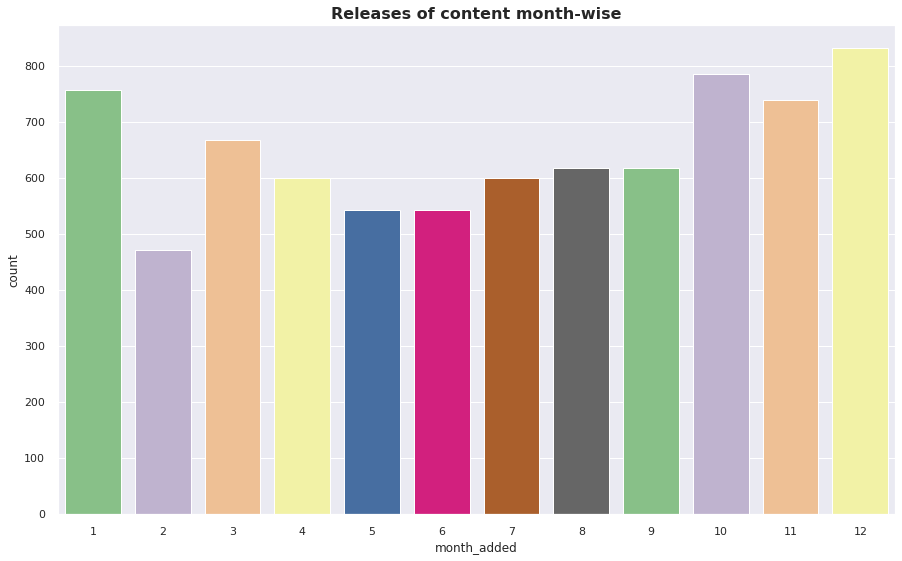

In [130]:
# Release of content month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=df,palette="Accent")

plt.title('Releases of content month-wise',size='16',fontweight="bold")    
plt.show()

**More of the content was released in holiday season - October, November, December and January**

## **Release of movies month-wise**

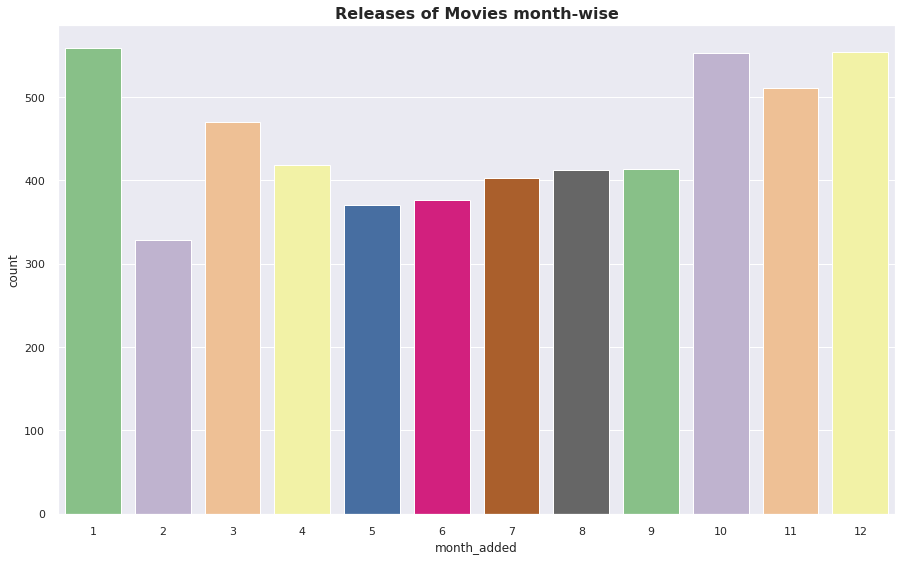

In [131]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=netflix_movies,palette="Accent")

plt.title('Releases of Movies month-wise',size='16',fontweight="bold")    
plt.show()

**More number of movie release in month of January and December.**

## **Releases of TV Shows month-wise**

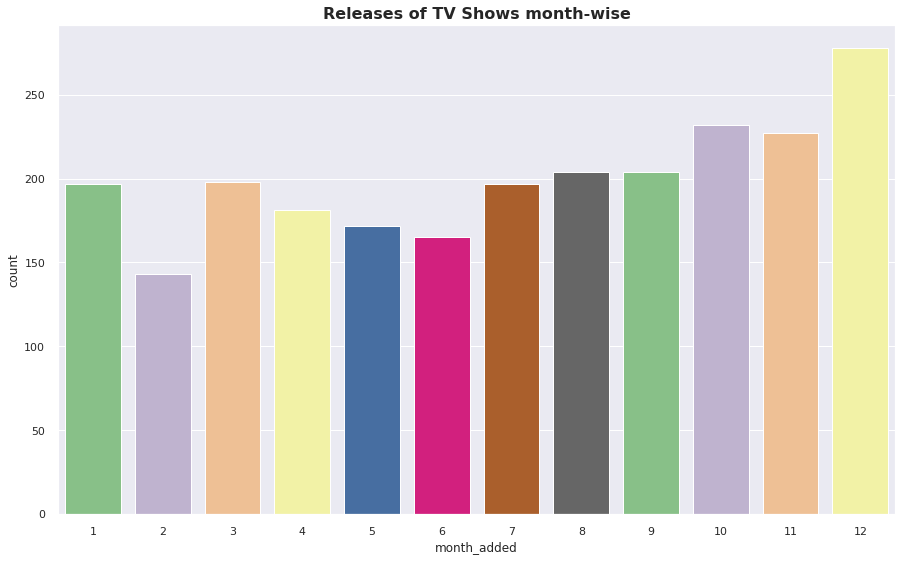

In [132]:
# Release of TV Shows month-wise
sns.set(rc={'figure.figsize':(15,9)})
sns.countplot(x='month_added',data=netflix_shows,palette="Accent")

plt.title('Releases of TV Shows month-wise',size='16',fontweight="bold")    
plt.show()

**More number of TV show release in month of December.**

## **Total release for last 10 years**

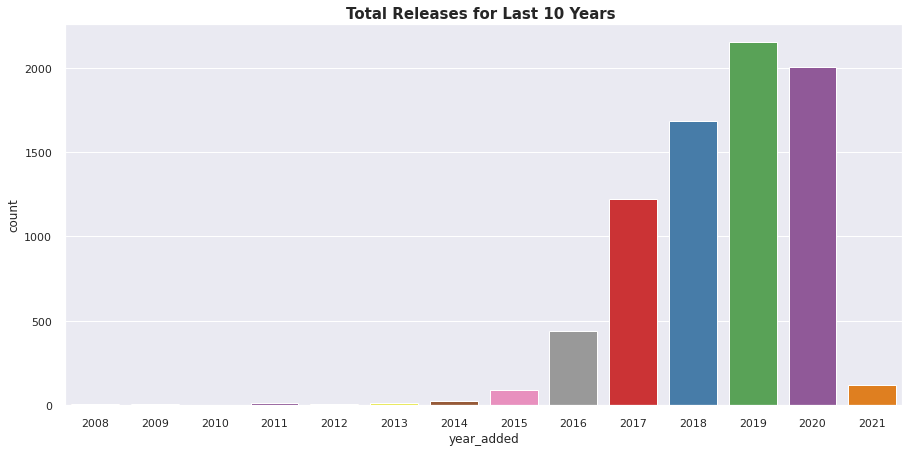

In [133]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x='year_added',data=df,palette="Set1")
plt.title('Total Releases for Last 10 Years ',size='15',fontweight="bold")    
plt.show()

**The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.**

## **Top 10 Movie Content Creating Countries**

In [134]:
countries={}
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [135]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

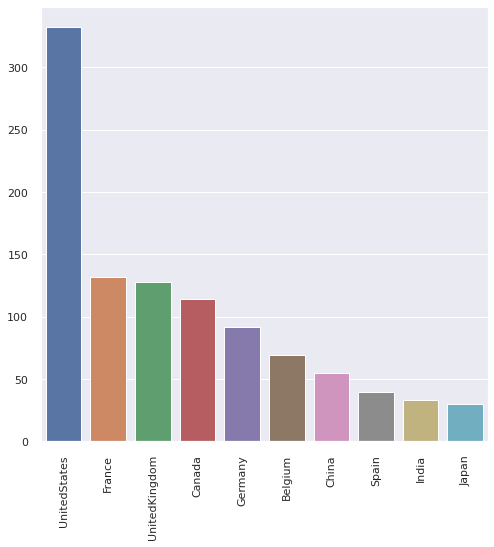

In [138]:
# plot of countries
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

## **Top 15 Countries Contributor on Netflix**

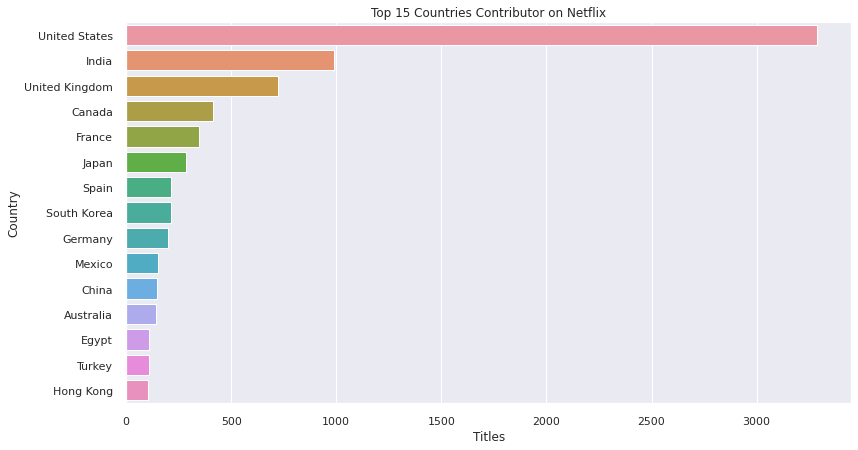

In [139]:
# countplot of top 15 countries
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [140]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [141]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [142]:
#Top 5 countries
top_countries=country_df
top_countries.head(5)

,country,Productions,TV-Shows,Movies
0,United States,3288,860,2428
1,India,990,75,915
2,United Kingdom,722,255,467
3,Country Unavailable,505,276,229
4,Canada,412,126,286


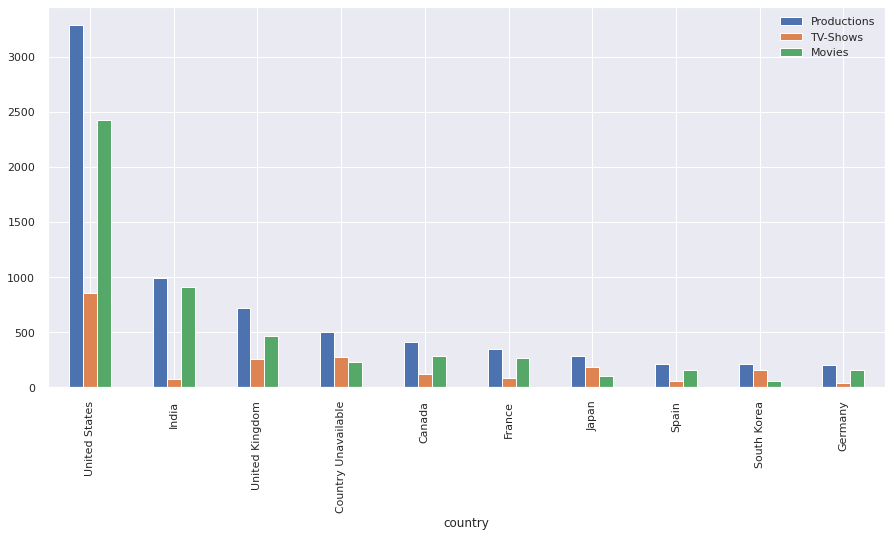

In [144]:
top_countries.head(10).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

**United State was highest contributor on netflix.**

## **Content across all years**

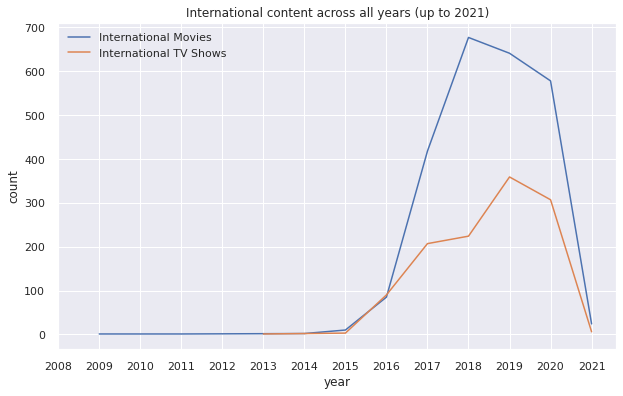

In [149]:
# line plot of international content
international_movies = df[df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2022]

international_shows = df[df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2022]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2022, 1))
plt.title("International content across all years (up to 2021)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

**Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years.**

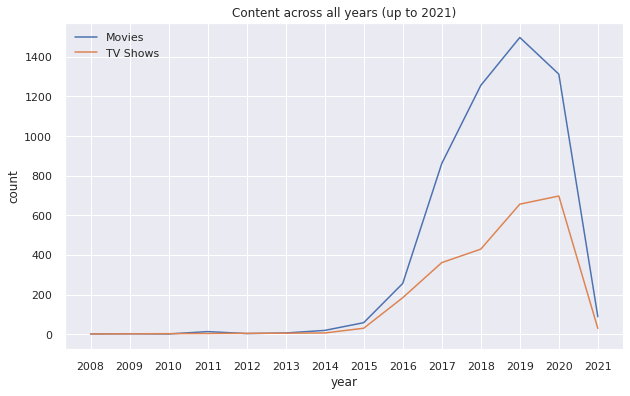

In [150]:
# line plot of content
netflix_movies = df[df['type']=='Movie']
intmov_year = netflix_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2022]

netflix_shows = df[df['type']=='TV Show']
intshow_year = netflix_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2022]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2022, 1))
plt.title("Content across all years (up to 2021)")
plt.legend(['Movies','TV Shows'])
plt.show()


**Growth in TV shows from 2018 to 2020.**

**Decreases in movies from 2019 to 2020.**

**Therefore Netflix has increasingly focusing on TV rather than movies in recent years.**

## **Netflix Content for different age groups in top 10 countries**

In [151]:
# Extracting data
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [152]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['age_rating'] = df['rating'].replace(rating_ages)
df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [154]:
# data of heatmap
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = df.loc[df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['age_rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Canada,Country Unavailable,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.467181,0.318812,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.526042,0.488518
Kids,0.150579,0.170297,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.078125,0.074809
Older Kids,0.220077,0.235644,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.184028,0.196242
Teens,0.027027,0.005941,0.030612,0.004184,0.012766,0.016260,0.000000,0.017857,0.071181,0.098469
Young Adults,0.135135,0.269307,0.142857,0.557531,0.336170,0.113821,0.365979,0.095238,0.140625,0.141962


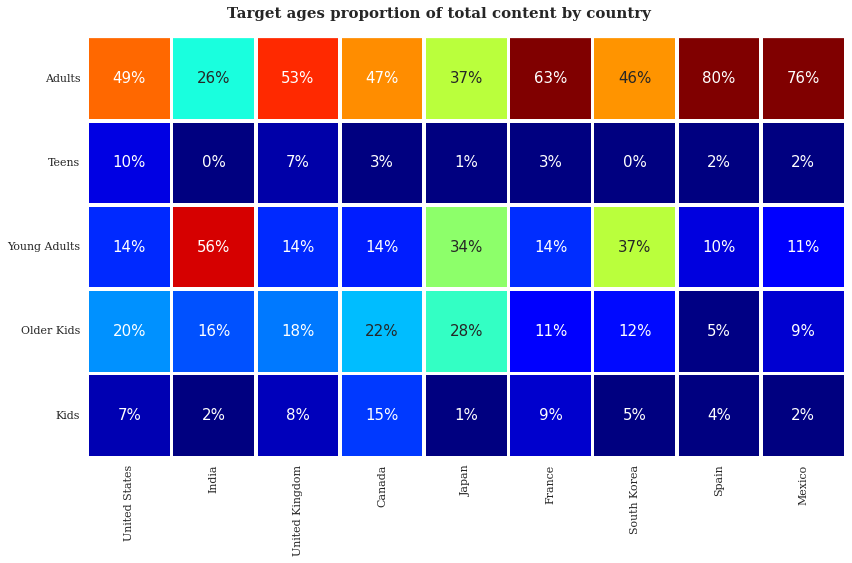

In [155]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

**Top:**

**80% of adults content present in Spain.**

**10% of teens content present in United States.**

**56% of young adults content present in India.**

**28% of older kids content present in Japan.**

**15% of kids content present in Canada.**
